In [1]:
import numpy as np
import pandas as pd
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter('ignore')
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib.arms import GaussianArm
from banditpylib.bandits import OrdinaryBandit
from banditpylib.protocols import SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.ordinary_fcbai_learner import ExpGap, LilUCBHeuristic

In [2]:
confidence = 0.95
means = [0.3, 0.5, 0.7]
arms = [GaussianArm(mu=mean, var=1) for mean in means]
bandit = OrdinaryBandit(arms=arms)
learners = [ExpGap(arm_num=len(arms), confidence=confidence, threshold=3, name='Exponential-Gap Elimination'),
            LilUCBHeuristic(arm_num=len(arms), confidence=confidence, name='Heuristic lilUCB')]
# for each setup we run 20 trials
trials = 20
temp_file = tempfile.NamedTemporaryFile()

In [3]:
# simulator
game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# start playing the game
# add `debug=True` for debugging purpose
game.play(trials=trials, output_filename=temp_file.name)

INFO:absl:start Exponential-Gap Elimination's play with ordinary_bandit
INFO:absl:Exponential-Gap Elimination's play with ordinary_bandit runs 1.07 seconds.
INFO:absl:start Heuristic lilUCB's play with ordinary_bandit
INFO:absl:Heuristic lilUCB's play with ordinary_bandit runs 1.53 seconds.


In [4]:
data_df = trial_data_messages_to_dict(temp_file.name)

In [5]:
data_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,2,5418,0.0,0.0,ordinary_bandit,Exponential-Gap Elimination
1,2,5418,0.0,0.0,ordinary_bandit,Exponential-Gap Elimination
2,2,5418,0.0,0.0,ordinary_bandit,Exponential-Gap Elimination
3,2,5418,0.0,0.0,ordinary_bandit,Exponential-Gap Elimination
4,2,5418,0.0,0.0,ordinary_bandit,Exponential-Gap Elimination


In [6]:
data_df['confidence'] = confidence

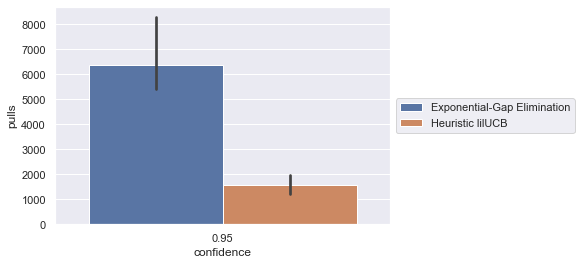

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=data_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))